# Example code for using sessarea.SessArea and other codebase tools

**Note:** This notebook covers several relevant methods of the `SessArea` and `Plane` objects, detailing some of their arguments, as well. For more details, take a look at the docstring associated with a method of interest.

**Import notes:** 

* These packages should be present if installing the conda environment from `mult3.yml` (where **3** refers to `Python 3`). 
* `util` is a [Github repo](https://github.com/colleenjg/util/tree/aibs_mult) of mine, and the correct branch `aibs_mult` is automatically installed from `mult3.yml`. Errors internal to the codebase involving `util` code and occurring *after* new changes have been pulled from the `MULTIBAR_Analysis` repo *may* be due to an update of the `aibs_mult` branch of `util`. Though I will try to avoid this, consider updating the utility under those circumstances.

In [115]:
import sys
import os
import copy

import numpy as np
from matplotlib import pyplot as plt

sys.path.extend(['.', '../'])
from analysis import sessarea
from mult_util import mult_gen_util
from util import math_util

## Set paths to main data directory and the mouse dataframe

In [116]:
datadir = os.path.join(
    '../data')
mouse_df = '../mouse_df.csv'

## 1. Basics of initializing a Session Area object

If you already know the **area**, **mouse number** (or **mouse_id**)  and **session number** (or **date**) you want to initialize:

In [117]:
mouse_n = 1
sess_n = 3
area = 2

You can directly initialize the **Session Area** object from this, and both of its recorded **planes** are loaded into the object:

In [118]:
sess = sessarea.SessArea(
    datadir, area, mouse_n=mouse_n, sess_n=sess_n, mouse_df=mouse_df)

Equivalent using the **mouse ID** instead of the *mouse number* and **date** instead of the *session number*

In [119]:
mouseid = 'CTBD7.2e'
date = 20190224
sess = sessarea.SessArea(
    datadir, area, mouseid=mouseid, date=date, mouse_df=mouse_df)

You may however only know, for example, which **layer**, **level** and **session numbers** you are interested in.  
**Notes:** 
* see the docstring of `mult_gen_util.get_sess_vals()` for all the options you can specify)
* **Splitting** the output of the function **by plane** can be useful, as, due to imaging constraints, the **recording of Plane 1 is often better quality** than the recording of Plane 2. Thus, when possible, we tend to focus on Plane 1 recordings. 

In [120]:
# target(s)
layer = 'L2'
level = 'deep'
sess_n = [3, 4, 5]

# information you need to initialize a SessArea object
return_labels = ['mouse_n', 'sess_n', 'area']

# whether to split it by planes
split_planes = True


session_values = mult_gen_util.get_sess_vals(
    mouse_df, return_labels, layer=layer, level=level, 
    sess_n=sess_n, split_planes=split_planes)

for p, plane_n in enumerate([1, 2]):
    print(f'\nPlane {plane_n} fits criteria:')
    sess_strs = [f'Mouse {m}, session {s}, area {a}' 
                 for m, s, a in zip(*session_values[p])]
    print('\n'.join(sess_strs))


Plane 1 fits criteria:
Mouse 1, session 3, area 2
Mouse 2, session 5, area 2
Mouse 3, session 5, area 2
Mouse 4, session 5, area 2
Mouse 5, session 3, area 2
Mouse 6, session 3, area 2
Mouse 6, session 4, area 2

Plane 2 fits criteria:
Mouse 2, session 5, area 1


With this information, you can **create the SessArea object as above**.

In [121]:
sess = sessarea.SessArea(
    datadir, area=2, mouse_n=1, sess_n=3, mouse_df=mouse_df)

### Some information contained in the session object

As mentioned above, when you load a SessArea object, **2 Plane objects** are created and set as **attributes of the SessArea object**.

In [122]:
for p in [1, 2]:
    plane = sess.get_plane(p)
    layer = plane.layer
    level = plane.level
    print(f'Plane {p}: {level} {layer}')

Plane 1: deep L2
Plane 2: deep L3


To **keep track of the plane being analysed**, you can set the attribute `sess.plane_oi`. It is not used internally, so it is only for the user's use. It can also be set at the time of initialization. 

In [123]:
# set the plane of interest for keeping track
sess.set_plane_oi(plane_oi=1)
print(f'Plane of interest: {sess.plane_oi}')

Plane of interest: 1


The **SessArea object** has attributes related to **both planes**.  
Here are a few:

In [124]:
print(f'area: {sess.area}')
print(f'task: {sess.task}')
print(f'mouse number: {sess.mouse_n}')
print(f'mouse ID: {sess.mouseid}')
print(f'number of trials: {sess.n_trials}')
print(f'number of trials with 2p recorded: {sess.n_trials_rec}')
print(f'Proportion GO trials: {sess.prop_go}')
print(f'GO position: {sess.go_pos}')
print(f'Proportion correct: {sess.prop_corr}')

area: 2
task: pd_2
mouse number: 1
mouse ID: CTBD7.2e
number of trials: 50
number of trials with 2p recorded: 50
Proportion GO trials: 0.5
GO position: 70
Proportion correct: 0.46


In [125]:
sess.trial_df.head()

trial_n  stim_pos   outcome  start2pfr  end2pfr  num2pfr
0        0        70    missed         17      212      195
1        1        70    missed        213      407      194
2        2        70    missed        408      603      195
3        3        49  corr_rej        604      799      195
4        4        49  corr_rej        800      996      196

In [126]:
print('Outcomes for each trial:\n{}'.format(
    ', '.join(sess.all_trial_outc)))

Outcomes for each trial:
missed, missed, missed, corr_rej, corr_rej, missed, missed, corr_rej, corr_rej, corr_rej, corr_rej, missed, corr_rej, missed, corr_rej, missed, missed, missed, corr_rej, missed, missed, missed, corr_rej, corr_rej, corr_rej, missed, corr_rej, missed, missed, corr_rej, missed, false_pos, missed, missed, missed, corr_rej, corr_rej, corr_rej, corr_rej, missed, missed, missed, missed, corr_rej, corr_rej, missed, missed, corr_rej, corr_rej, corr_rej


The **Plane objects** have **plane-specific** attributes.
Here are a few:

In [127]:
plane = sess.get_plane(sess.plane_oi)
print(f'depth aimed for: {plane.depth} um')
print(f'actual depth: {plane.depth_act} um')
print(f'layer: {plane.layer}')
print(f'level: {plane.level}')
print(f'number of ROIs: {plane.nrois}')
print(f'2p frame per sec: {plane.twop_fps}')
print(f'number of 2p frames: {plane.tot_twop_fr}')
print(f'stimulus duration: {plane.stim_leng} s')
print(f'deemed good enough quality for analysis: {bool(plane.usable)}')
print(f'recommended for inclusion by Mariangela: {bool(plane.incl)}')
print(f'Additional info (e.g., mvt if Mariangela noted '
      f'\nthat there was movement in the recording: {plane.info}')

depth aimed for: 190 um
actual depth: 182 um
layer: L2
level: deep
number of ROIs: 50
2p frame per sec: 15.025
number of 2p frames: 10000
stimulus duration: 1.4942416234380609 s
deemed good enough quality for analysis: True
recommended for inclusion by Mariangela: True
Additional info (e.g., mvt if Mariangela noted 
that there was movement in the recording: mvt


**Notes:** 
* Occasionally only **Plane 1** was recorded, so **Plane 2 attributes** are set to `None`.
* For some sessions, the mouse was trained, but no recordings were made, so **2P-related attributes are set to** `None`.

## 2. Identifying responsive ROIs

The following method allows you to identify **ROIs** that are **responsive** to each **stimulus position**, based 
on **certain criteria**, _e.g., across relevant trials, their response 1 sec after trial onset is significantly different (p-val < 0.01) from their response 1 sec before trial onset._

`+`: more active after trial onset  
`-`: less active after trial onset

In [128]:
plane.set_resp_rois(pre=1, post=1, p_thr=0.01)
for p, pos in enumerate(sess.stim_pos):
    print(f'\nStim position: {pos}')
    resp_roi_ns = np.where(plane.resp_rois[:, p])[0]
    signif_sign = plane.resp_roi_sign[resp_roi_ns, p]
    signif_sign_str = ['-' if sign == -1 else '+' 
                       for sign in signif_sign]
    roi_strs = [f'{roi}{sign}' for roi, sign in zip(resp_roi_ns, signif_sign_str)]
    print('Responsive ROIs: {}'.format(', '.join(roi_strs)))


Stim position: 49
Responsive ROIs: 3+, 4+, 6+, 12+, 13+, 28+

Stim position: 70
Responsive ROIs: 3+, 6+, 13+, 19+, 38+, 45+


The following method allows you to identify **ROIs** that are **responsive** to each **trial outcome**, based 
on **certain criteria**, _e.g., across relevant trials, their response 1 sec after trial onset is significantly different (p-val < 0.01) from their response 1 sec before trial onset._

`+`: more active after trial onset  
`-`: less active after trial onset

In [129]:
plane.set_outc_resp_rois(pre=1, post=1, p_thr=0.01)
for t, outc in enumerate(sess.trial_outc):
    print(f'\nTrial outcome: {outc}')
    resp_roi_ns = np.where(plane.outc_resp_rois[:, t])[0]
    signif_sign = plane.outc_resp_roi_sign[resp_roi_ns, t]
    signif_sign_str = ['-' if sign == -1 else '+' 
                       for sign in signif_sign]
    roi_strs = [f'{roi}{sign}' for roi, sign in zip(resp_roi_ns, signif_sign_str)]
    print('Responsive ROIs: {}'.format(', '.join(roi_strs)))


Trial outcome: corr_rej
Responsive ROIs: 3+, 4+, 6+, 12+, 13+, 28+

Trial outcome: false_pos
Responsive ROIs: 

Trial outcome: missed
Responsive ROIs: 3+, 6+, 13+, 19+, 38+, 45+


**Note:** this was a novice mouse who licked on only one trial, peforming basically at chance

## 3. Plot some data

* Retrieve trials of interest
* Get the corresponding 2P frame numbers (reference frame)
* Get the data in the time period around each reference frame, specifying
  * `pre`: how many seconds to take before each trial
  * `post`: how many seconds to take after each trial
  * `trace_type`: type of trace to return (e.g., corrected `corr`, raw `raw`, denoised `denoised`)
  * `integ`: whether to integrate over the frames for each trial
  * `resp_rois`: if True, only ROIs responsive to at least one stimulus position are included in the array returned
 
* Returns:
  * xran: time values for the 2p frames
  * roi_data: ROI x sequences (x frames if not `integ`)

Briefly defining a function for plotting and a function that modifies plotting parameters

In [130]:
def plot_mean_data_on_subplot(subax, xran, data, title=''):
    # mean per ROI
    _ = subax.plot(xran, np.mean(data, axis=1).T, alpha=1.0, marker='.')
    # mean across ROIs
    _ = subax.plot(xran, np.mean(np.mean(data, axis=1).T, axis=1), 
                lw=5, c='k', alpha=0.7, marker='o', label='mean across ROIs')
    _ = subax.axvline(0, c='k')
    _ = subax.legend()
    _ = subax.set_title(title)

def set_nice_plotting_parameters():
    params = {
              'axes.labelsize'       : 'xx-large', # xx-large axis labels
              'axes.linewidth'       : 1.5,        # thicker axis lines
              'axes.spines.right'    : False,      # no axis spine on right
              'axes.spines.top'      : False,      # no axis spine at top
              'axes.titlesize'       : 'x-large',  # x-large axis title
              'figure.autolayout'    : True,       # adjusts layout
              'font.size'            : 12,         # basic font size value
              'legend.fontsize'      : 'x-large',  # x-large legend text
              'lines.linewidth'      : 2.5,        # thicker lines
              'lines.markersize'     : 10,         # bigger markers
              'xtick.labelsize'      : 'x-large',  # x-large x-tick labels
              'xtick.major.size'     : 8.0,        # longer x-ticks
              'xtick.major.width'    : 2.0,        # thicker x-ticks
              'ytick.labelsize'      : 'x-large',  # x-large y-tick labels
              'ytick.major.size'     : 8.0,        # longer y-ticks
              'ytick.major.width'    : 2.0,        # thicker y-ticks
              }
    plt.rcParams.update(params)

This just modifies plotting parameters, for aesthetic reasons

In [131]:
set_nice_plotting_parameters()

First, plotting responses of **stimulus responsive ROIs** to **GO** and **NOGO** trial onsets.

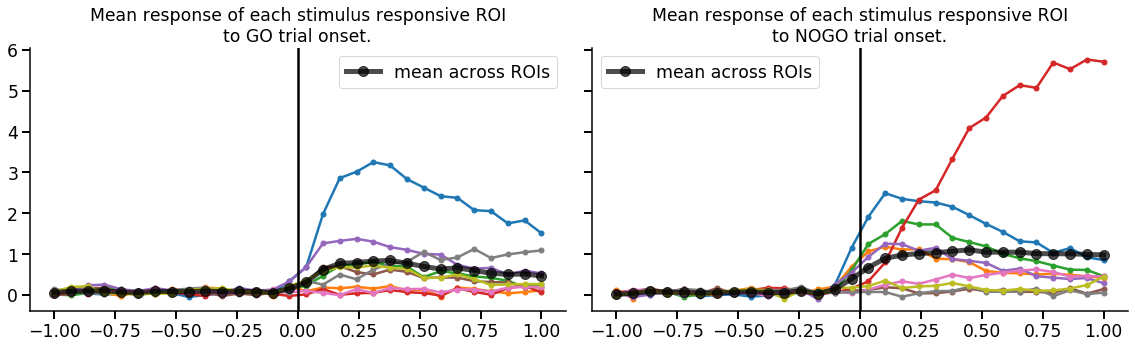

In [132]:
pre = 1
post = 1
trace_type = 'corr'
integ = False
resp_rois = True

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 5))

for p, (name, pos) in enumerate(
    zip(['GO', 'NOGO'], [sess.go_pos, sess.nogo_pos])):

    trial_ns = sess.get_trials_by_criteria(stim_pos=pos)
    twop_ref_fr = plane.get_twop_fr_by_trial(trial_ns, first=True)
    xran, roi_data = plane.get_roi_trace_array(twop_ref_fr, pre=pre, 
        post=post, trace_type=trace_type, integ=integ, resp_rois=resp_rois)
    title = f'Mean response of each stimulus responsive ROI\nto {name} trial onset.'
    plot_mean_data_on_subplot(ax[p], xran, roi_data, title)

Now, plotting responses of **stimulus responsive ROIs** to **missed** and **correction rejection** trial onsets.  
**Note:** These traces should be **nearly identical** to the ones above, as this mouse **almost never licked on a trial**, effectively missing all the GO trials and correctly rejecting all but 1 NOGO trial.

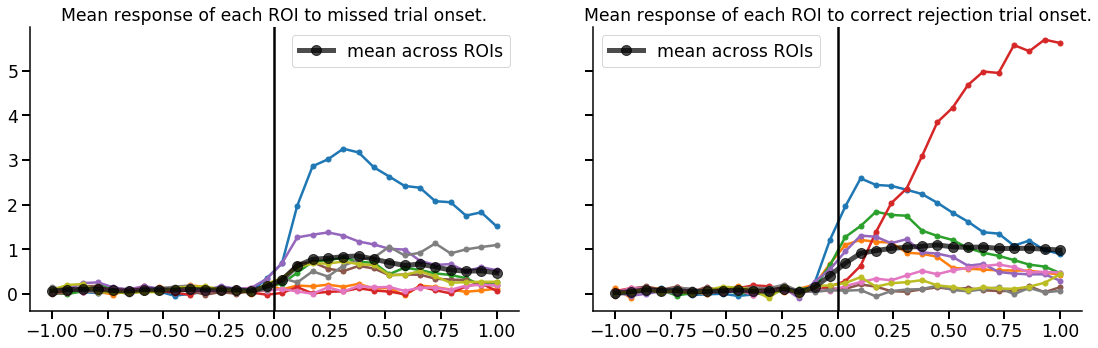

In [133]:
pre = 1
post = 1
trace_type = 'corr'
integ = False
resp_rois = True
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,5))

for o, (name, outc) in enumerate(
    zip(['missed', 'correct rejection'], ['missed', 'corr_rej'])):
    trial_ns = sess.get_trials_by_criteria(outcome=outc)
    twop_ref_fr = plane.get_twop_fr_by_trial(trial_ns, first=True)
    xran, roi_data = plane.get_roi_trace_array(twop_ref_fr, pre=pre, 
        post=post, trace_type=trace_type, integ=integ, resp_rois=resp_rois)
    title = f'Mean response of each ROI to {name} trial onset.'
    plot_mean_data_on_subplot(ax[o], xran, roi_data, title)

**Denoised traces** are obtained using the **OASIS package** which is installed independently in the environment, as described in the README.md.  
The resulting signal is much smoother, with inferred noise having been removed.

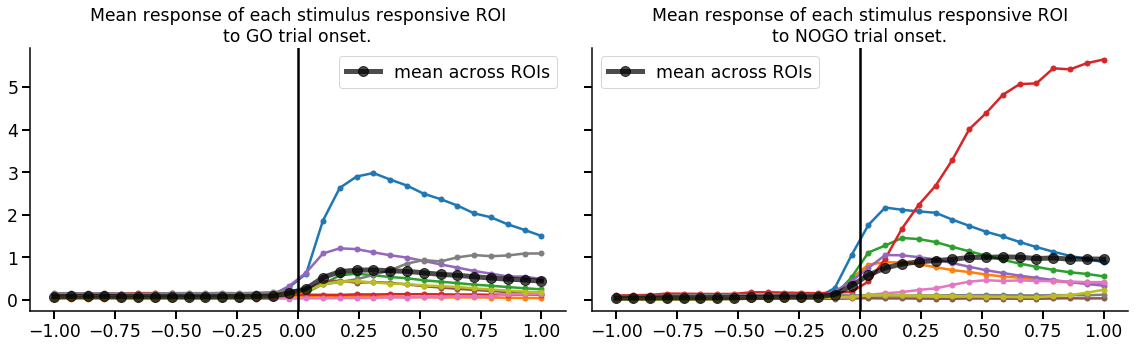

In [134]:
pre = 1
post = 1
trace_type = 'denoised'
integ = False
resp_rois = True

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 5))

for p, (name, pos) in enumerate(
    zip(['GO', 'NOGO'], [sess.go_pos, sess.nogo_pos])):

    trial_ns = sess.get_trials_by_criteria(stim_pos=pos)
    twop_ref_fr = plane.get_twop_fr_by_trial(trial_ns, first=True)
    xran, roi_data = plane.get_roi_trace_array(twop_ref_fr, pre=pre, 
        post=post, trace_type=trace_type, integ=integ, resp_rois=resp_rois)
    title = f'Mean response of each stimulus responsive ROI\nto {name} trial onset.'
    plot_mean_data_on_subplot(ax[p], xran, roi_data, title)

**Corrected traces (dF/F)** are most typically used. Compared to **raw traces** (see below), they have been through dynamic baseline correction (noticed how separated the pre-0 traces are below) and scaling (notice the y-axis values).  
In addition to correcting for changes within a session (baseline drifting, signal dimming, etc.), this correction allows data from different ROIs to be compared and merged when needed. In my experience, raw traces are not typically used for analyses.

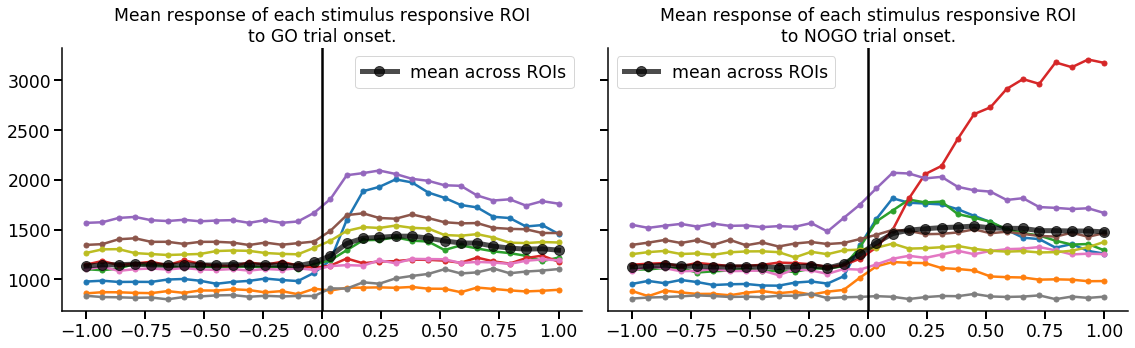

In [135]:
pre = 1
post = 1
trace_type = 'raw'
integ = False
resp_rois = True

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 5))

for p, (name, pos) in enumerate(
    zip(['GO', 'NOGO'], [sess.go_pos, sess.nogo_pos])):

    trial_ns = sess.get_trials_by_criteria(stim_pos=pos)
    twop_ref_fr = plane.get_twop_fr_by_trial(trial_ns, first=True)
    xran, roi_data = plane.get_roi_trace_array(twop_ref_fr, pre=pre, 
        post=post, trace_type=trace_type, integ=integ, resp_rois=resp_rois)
    title = f'Mean response of each stimulus responsive ROI\nto {name} trial onset.'
    plot_mean_data_on_subplot(ax[p], xran, roi_data, title)